<a href="https://colab.research.google.com/github/i-r-a/toxic/blob/master/linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2grey

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc

In [ ]:
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io

In [ ]:
train = pd.read_csv('drive/My Drive/jigsaw-toxic-comment-train.csv')

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
import string

In [ ]:
clean = []
for elem in train.comment_text:
  #remove ip address
  elem = re.sub( r'[0-9]+(?:\.[0-9]+){3}','', elem )
  #remove url
  elem = re.sub(r'^https?:\/\/.*[\r\n]*', '', elem)
  #remove tab/newline
  elem = re.sub(r'[\n\t]',' ',elem)
  #remove punctuation
  elem = elem.translate(elem.maketrans("","",string.punctuation))
  #remove multiple space
  elem = re.sub(r'[ ]{2,}',' ',elem)
  clean.append(elem)

In [ ]:
clean

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
train['comment_text'] = np.array(clean)

In [ ]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation Why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,Daww He matches this background colour Im seem...,0,0,0,0,0,0
2,000113f07ec002fd,Hey man Im really not trying to edit war Its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,More I cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,You sir are my hero Any chance you remember wh...,0,0,0,0,0,0


In [ ]:
train.comment_text[2]

'Hey man Im really not trying to edit war Its just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page He seems to care more about the formatting than the actual info'

In [ ]:
train['toxic'].value_counts()

0    202165
1     21384
Name: toxic, dtype: int64

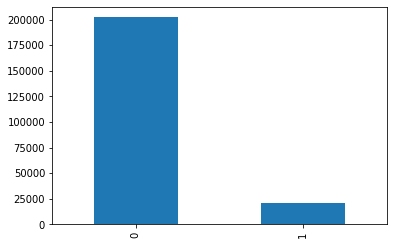

In [ ]:
train.toxic.value_counts().plot(kind = 'bar')

In [ ]:
train['severe_toxic'].value_counts()

0    221587
1      1962
Name: severe_toxic, dtype: int64

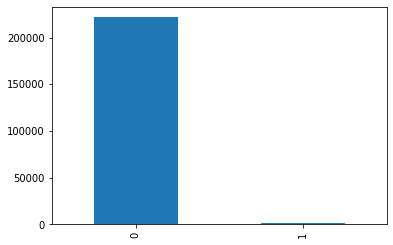

In [ ]:
train.severe_toxic.value_counts().plot(kind = 'bar')

0    211409
1     12140
Name: obscene, dtype: int64


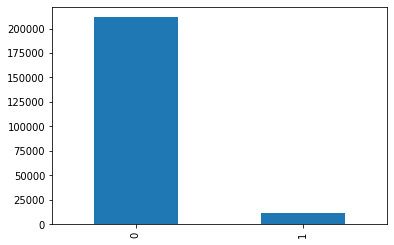

In [ ]:
print(train['obscene'].value_counts())
train.obscene.value_counts().plot(kind = 'bar')

0    222860
1       689
Name: threat, dtype: int64


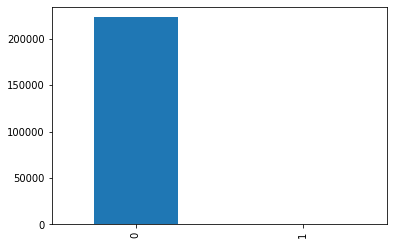

In [ ]:
print(train['threat'].value_counts())
train.threat.value_counts().plot(kind = 'bar')

0    212245
1     11304
Name: insult, dtype: int64


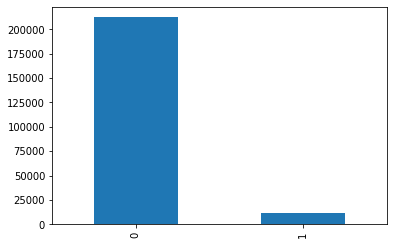

In [ ]:
print(train['insult'].value_counts())
train.insult.value_counts().plot(kind = 'bar')

0    221432
1      2117
Name: identity_hate, dtype: int64


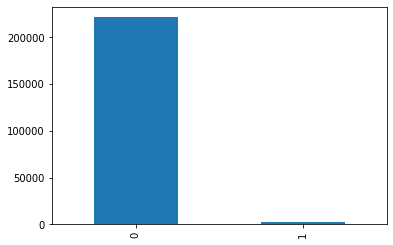

In [ ]:
print(train['identity_hate'].value_counts())
train.identity_hate.value_counts().plot(kind = 'bar')

In [ ]:
train.comment_text.str.split(expand=True).stack().value_counts()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [ ]:
le = preprocessing.LabelEncoder()
cz = le.fit_transform(train.comment_text)

In [ ]:
cz

array([101362,  96208, 110871, ..., 216875, 140180,  61746])

In [ ]:
train

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,101362,0,0,0,0,0,0
1,000103f0d9cfb60f,96208,0,0,0,0,0,0
2,000113f07ec002fd,110871,0,0,0,0,0,0
3,0001b41b1c6bb37e,36603,0,0,0,0,0,0
4,0001d958c54c6e35,202931,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
223544,fff8f64043129fa2,136031,0,0,0,0,0,0
223545,fff9d70fe0722906,140036,0,0,0,0,0,0
223546,fffa8a11c4378854,216875,0,0,0,0,0,0
223547,fffac2a094c8e0e2,140180,1,0,1,0,1,0


In [ ]:
y_col = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
x = cz
y = train[y_col]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=300)

In [ ]:
x_train,y_train

(array([ 81427, 117985, 110327, ..., 164554, 221893,   4167]),
         toxic  severe_toxic  obscene  threat  insult  identity_hate
 67632       0             0        0       0       0              0
 197         0             0        0       0       0              0
 201955      1             0        1       0       1              0
 199981      0             0        0       0       0              0
 207263      0             0        0       0       0              0
 ...       ...           ...      ...     ...     ...            ...
 7146        0             0        0       0       0              0
 169674      0             0        0       0       0              0
 60309       1             0        1       0       1              0
 203233      1             0        1       0       1              0
 50385       0             0        0       0       0              0
 
 [178839 rows x 6 columns])

In [ ]:
x_train = x_train.reshape(-1,1)

In [ ]:
LIN = LinearRegression()
LIN.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
x_test = x_test.reshape(-1,1)
y_pred = LIN.predict(x_train)
y_pred2 = LIN.predict(x_test)


In [ ]:
from sklearn import metrics

In [ ]:
#train MAE
print(metrics.mean_absolute_error(y_train,y_pred))

0.0678408165965926


In [ ]:
#test MAE
print(metrics.mean_absolute_error(y_test,y_pred2))

0.0687818216355333


In [ ]:
#test MSE
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

0.18683087250984098
